Example : 

The value of the game =  4.871
Optimal strategy for the first player: 
 | p || 0 | 4/31 | 3/31 | 27/62 | 21/62 | 0 | 

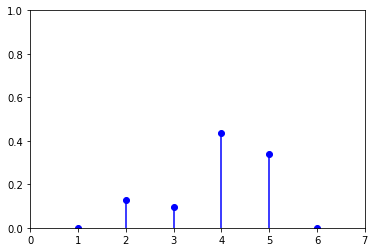

Optimal strategy for the second player: 
 | q || 0 | 0 | 257/372 | 9/62 | 55/372 | 1/62 | 

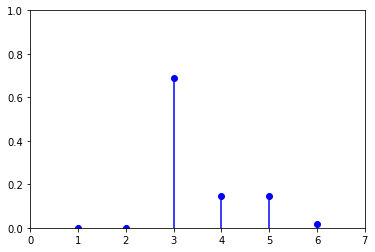

Range of the optimal strategy consists of one point : 

The value of the game =  2.0
Optimal strategy for the first player: 
 | p || 0 | 1 | 0 | 

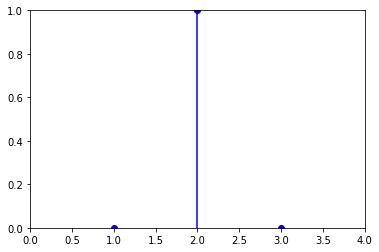

Optimal strategy for the second player: 
 | q || 1 | 0 | 0 | 

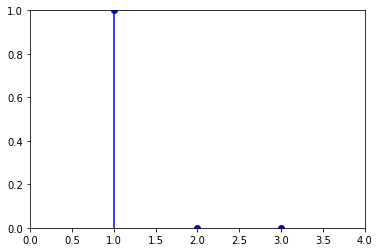

Range of the optimal strategy is incomplete
The value of the game =  1.0
Optimal strategy for the first player: 
 | p || 0 | 1/2 | 1/2 | 0 | 

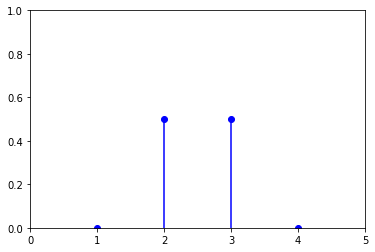

Optimal strategy for the second player: 
 | q || 1/2 | 0 | 0 | 1/2 | 

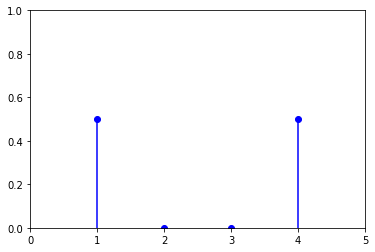

Range of the optimal strategy is full
The value of the game =  0.0
Optimal strategy for the first player: 
 | p || 1/2 | 1/2 | 

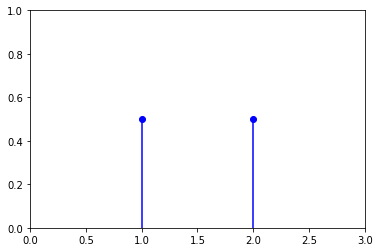

Optimal strategy for the second player: 
 | q || 1/2 | 1/2 | 

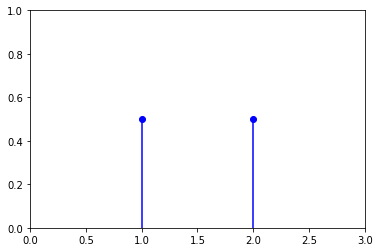

In [22]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from fractions import Fraction

def nash_equilibrium(A_win):

    m, n = A_win.shape # m = strigs, n = columns

# all A elements should be > 0
    min_in_matr = A_win.min()
    check = 0
    if (min_in_matr <= 0):
        A_win = A_win - min_in_matr + 1
        check = 1

#solving problem for 2nd player
    c = np.array([-1] * n) # multipliers for the 2nd player
    b = np.array([1] * m) # multipliers for constraints for the 2nd player
    res = linprog(c, A_win, b)
    opt_str_2 = res.x # here is a vector, not exactly what I need
    val_of_g = 1 / opt_str_2.sum()
    opt_str_2 *= val_of_g 

#solving problem for 1st player
    A = -A_win.transpose()
    c = np.array([1] * m) # multipliers for the second player
    b = np.array([-1] * n) # multipliers for constraints for the second player
    res = linprog(c, A, b)
    opt_str_1 = res.x * val_of_g

#don't forget about changes with matrix
    if (check):
        val_of_g = val_of_g + min_in_matr - 1
        
    return (val_of_g, opt_str_1, opt_str_2)

#visual
def visualisation(vect):
    a = [i for i in range(1, len(vect) + 1)] #Vector of ordinates of all points
    for pt in range(0, len(vect)):
        plt.plot([pt + 1, pt + 1], [0, vect[pt]], 'b-') #Plotting lines from OX to all points
    plt.plot(a, vect, 'bo') #Plotting all points
    plt.axis([0, len(vect)+1, 0, 1]) #Numbers on OX and OY
    plt.show()

#main

def main(file_name):
#read matrix from file
    matrix = []
    with open(file_name) as test:
        for line in test:
            line = line.replace(' ','') #remove all spaces in line
            line = line.strip('\n').strip('|') #remove '\n' and first and last '|'
            row = [int(x) for x in line.split('|')] #make int from strings separated by '|'
            matrix.append(row)
    matrix = np.array(matrix) #convert matrix to numpy array
    
    v, p, q = nash_equilibrium(matrix)
    print("The value of the game = ", np.around(v, 3))
    print("Optimal strategy for the first player: \n | p || ", end='')
    for x in p:
        print(Fraction(x).limit_denominator(), '| ', end='')
    visualisation(p)
    print("Optimal strategy for the second player: \n | q || ", end='')
    for x in q:
        print(Fraction(x).limit_denominator(), '| ', end='')
    visualisation(q)

# applying
print("Example : \n")
main("test.txt")
print("Range of the optimal strategy consists of one point : \n")
main("test1.txt")
print("Range of the optimal strategy is incomplete")
main("test2.txt")
print("Range of the optimal strategy is full")
main("test3.txt")
